In [1]:
import numpy as np 
import pandas as pd 
from pandas import ExcelWriter
from pandas import ExcelFile
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import plotly.express as px
import plotly.graph_objs as go
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

In [2]:
import plotly.io as pio

pio.renderers
pio.renderers.default = "svg"

In [3]:
Queries=pd.read_excel('GoogleSearchConsole.xlsx', sheet_name='Queries')
Queries.head(n=10)

Query  Clicks  Impressions     CTR  Position
0                     refined data     461         1658  0.2780      1.50
1           refined data solutions     149          414  0.3599      1.96
2                      refine data      35          989  0.0354      5.02
3                    hugh molyneux      22          941  0.0234      6.66
4                 refined software      22          436  0.0505      5.64
5                           rphone      17          901  0.0189      7.60
6                   ehs compliance      14         4445  0.0031     28.48
7  ehs incident reporting software       6         3471  0.0017     37.82
8             what is refined data       6          444  0.0135      2.32
9          ehs management software       4         4078  0.0010     62.99

In [4]:
Queries.shape

(1000, 5)

In [5]:
Countries=pd.read_excel('GoogleSearchConsole.xlsx', sheet_name="Countries")
Countries.head(n=10)

Country  Clicks  Impressions     CTR  Position
0          Canada     573         8827  0.0649     33.80
1   United States     500        17194  0.0291     39.39
2           India     120         7506  0.0160     38.13
3  United Kingdom      71         4893  0.0145     47.12
4       Australia      35         2081  0.0168     52.52
5           Chile      22          611  0.0360     35.94
6         Germany      19         1476  0.0129     40.84
7          France      14         1075  0.0130     45.54
8          Mexico      13         2501  0.0052     44.50
9    South Africa       9          611  0.0147     40.32

In [6]:
def missingdata(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    ms=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    ms= ms[ms["Percent"]> 0]
    return ms

In [7]:
missingdata(Queries)

Empty DataFrame
Columns: [Total, Percent]
Index: []

In [8]:
Queries=Queries.dropna()

In [9]:
Queries.describe()

Clicks  Impressions          CTR     Position
count  1000.000000  1000.000000  1000.000000  1000.000000
mean      0.777000    95.170000     0.003056    59.397150
std      15.401314   319.935027     0.029782    28.346639
min       0.000000     2.000000     0.000000     1.000000
25%       0.000000     5.000000     0.000000    38.867500
50%       0.000000    12.500000     0.000000    62.810000
75%       0.000000    50.250000     0.000000    80.140000
max     461.000000  4445.000000     0.500000   191.500000

In [10]:
Queries.shape

(1000, 5)

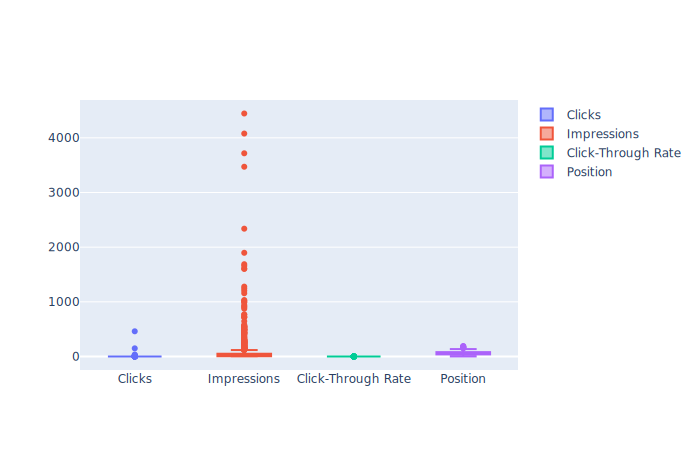

In [11]:
from plotly.offline import iplot
trace0 = go.Box(y=Queries["Clicks"],name="Clicks")
trace1 = go.Box(y=Queries["Impressions"],name="Impressions")
trace2 = go.Box(y=Queries["CTR"],name="Click-Through Rate")
trace3 = go.Box(y=Queries["Position"],name="Position")
data = [trace0, trace1, trace2,trace3]
iplot(data)

In [12]:
Queries.columns

Index(['Query', 'Clicks', 'Impressions', 'CTR', 'Position'], dtype='object')

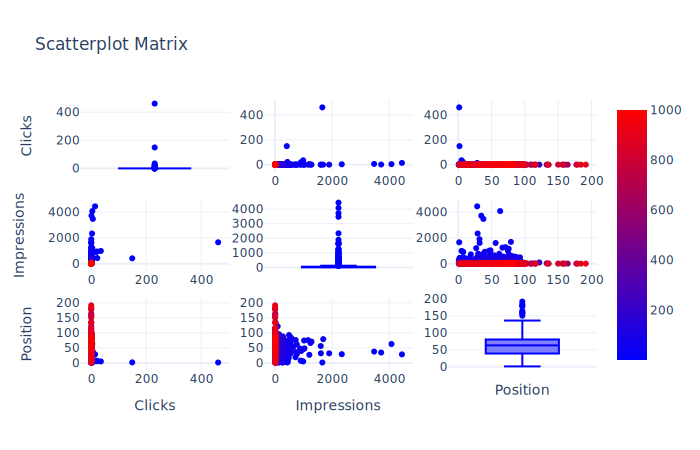

In [13]:
import plotly.figure_factory as ff
data= Queries.loc[:,["Clicks","Impressions", "Position"]]
data["index"] = np.arange(1,len(data)+1)
# scatter matrix
fig = ff.create_scatterplotmatrix(data, diag='box', index='index',colormap='Bluered',
                                  colormap_type='cat',
                                  height=1000, width=1000)
fig.layout.template="plotly_white"
iplot(fig)

In [14]:
Queries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Query        1000 non-null   object 
 1   Clicks       1000 non-null   int64  
 2   Impressions  1000 non-null   int64  
 3   CTR          1000 non-null   float64
 4   Position     1000 non-null   float64
dtypes: float64(2), int64(2), object(1)
memory usage: 46.9+ KB


In [15]:
data=Queries.sort_values(['CTR'], ascending=False)
data

Query  Clicks  Impressions     CTR  \
37                  refined it solutions       1            2  0.5000   
36                  moodle adobe connect       1            2  0.5000   
1                 refined data solutions     149          414  0.3599   
0                           refined data     461         1658  0.2780   
35                     giselle solutions       1            4  0.2500   
..                                   ...     ...          ...     ...   
361                          riocan logo       0           27  0.0000   
362                       hse stands for       0           27  0.0000   
363      real estate document management       0           27  0.0000   
364           incident report mobile app       0           27  0.0000   
999  health & safety management software       0            3  0.0000   

     Position  
37      14.50  
36       7.00  
1        1.96  
0        1.50  
35      21.00  
..        ...  
361     52.85  
362     69.63  
363     81.37  
364     92.30  
999     83.33  

[1000 rows x 5 columns]

In [16]:
Query_2=data[data.CTR != 0]
Query_2

Query  Clicks  Impressions     CTR  \
37                   refined it solutions       1            2  0.5000   
36                   moodle adobe connect       1            2  0.5000   
1                  refined data solutions     149          414  0.3599   
0                            refined data     461         1658  0.2780   
35                      giselle solutions       1            4  0.2500   
34                  iso standards for ehs       1            5  0.2000   
13                             refinedata       3           19  0.1579   
33                         moodle connect       1            7  0.1429   
32                 ehs incident reporting       1            8  0.1250   
31                           ohs software       1           10  0.1000   
30                           ehs standard       1           17  0.0588   
4                        refined software      22          436  0.0505   
17                      ehs iso standards       2           42  0.0476   
29                   vantage point online       1           22  0.0455   
2                             refine data      35          989  0.0354   
28                          wallhere .com       1           30  0.0333   
27                                ehs iso       1           40  0.0250   
3                           hugh molyneux      22          941  0.0234   
5                                  rphone      17          901  0.0189   
12                            terry shane       3          211  0.0142   
8                    what is refined data       6          444  0.0135   
26                       real estate data       1           92  0.0109   
25                      refined solutions       1          107  0.0093   
24                     adobe connect pods       1          128  0.0078   
16           ehs software for real estate       2          263  0.0076   
15                     ehs risk inventory       2          273  0.0073   
23                             bomex 2020       1          165  0.0061   
22  occupational health & safety software       1          183  0.0055   
14                               wallhere       2          446  0.0045   
21               ehs compliance checklist       1          291  0.0034   
10                            what is ehs       4         1203  0.0033   
6                          ehs compliance      14         4445  0.0031   
20                                vantage       1          484  0.0021   
7         ehs incident reporting software       6         3471  0.0017   
19     ehs regulatory compliance software       1          718  0.0014   
11                ehs compliance software       3         2338  0.0013   
9                 ehs management software       4         4078  0.0010   
18            incident reporting software       1         3717  0.0003   

    Position  
37     14.50  
36      7.00  
1       1.96  
0       1.50  
35     21.00  
34      4.20  
13      1.21  
33      5.14  
32     38.75  
31     75.00  
30     20.53  
4       5.64  
17      5.57  
29     53.27  
2       5.02  
28      9.13  
27     22.88  
3       6.66  
5       7.60  
12     25.60  
8       2.32  
26     72.16  
25     11.08  
24     29.28  
16      2.51  
15      5.01  
23      7.55  
22     66.75  
14      9.48  
21     17.67  
10     27.01  
6      28.48  
20     17.47  
7      37.82  
19     18.98  
11     29.19  
9      62.99  
18     34.66

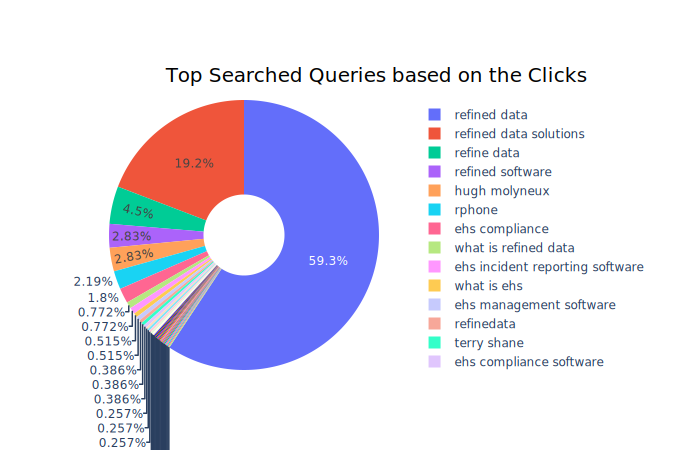

In [17]:
values= Query_2['Clicks']
labels=Query_2.Query
fig = {
    'data' : [
        {
            'values' : values,
            'labels' : labels,
            "domain": {"x": [0, 1]},
            'name' : "Query",
            'hoverinfo' : 'label+percent+name',
            'hole' : 0.3,
            'type' : 'pie'
        },],
    'layout' : {
        "annotations": [
            { "font": { "size": 20, 'color':'black'},
              "showarrow": False,
              "text": "Top Searched Queries based on the Clicks",
                "x": 0.25,
                "y": 1.15
            },
        ]
    }
}

iplot(fig)

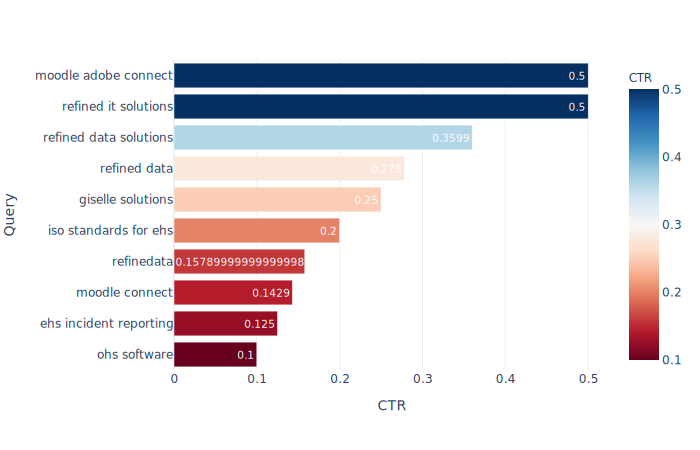

In [18]:
fig = px.bar(Queries.sort_values(by='CTR', ascending =False).head(10), x='CTR', y="Query", text='CTR', color="CTR", color_continuous_scale="rdbu")
fig.update_traces(texttemplate='%{text:}', textposition='inside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='show')
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.layout.template="plotly_white"
fig.update_layout(
    autosize=True,
    showlegend=False
)
fig.show() 

In [19]:
q1= Queries.sort_values(by='Clicks', ascending =False).head(10)
q2=Queries.sort_values(by='Impressions', ascending =False).head(10)
q3=Queries.sort_values(by='CTR', ascending =False).head(10)
q4=Queries.sort_values(by='Position', ascending =False).head(10)
q4

Query  Clicks  Impressions  CTR  \
903                       change management       0            4  0.0   
902          inventory management dashboard       0            4  0.0   
820                           mitigate risk       0            5  0.0   
744            property management software       0            6  0.0   
568  emissions management software refining       0           10  0.0   
678          value selling training program       0            7  0.0   
819            change management specialist       0            5  0.0   
743         energy data management software       0            6  0.0   
818          facility maintenance solutions       0            5  0.0   
587              mobile incident management       0            9  0.0   

     Position  
903    191.50  
902    184.25  
820    179.20  
744    177.33  
568    164.40  
678    160.43  
819    157.60  
743    156.33  
818    150.00  
587    135.78

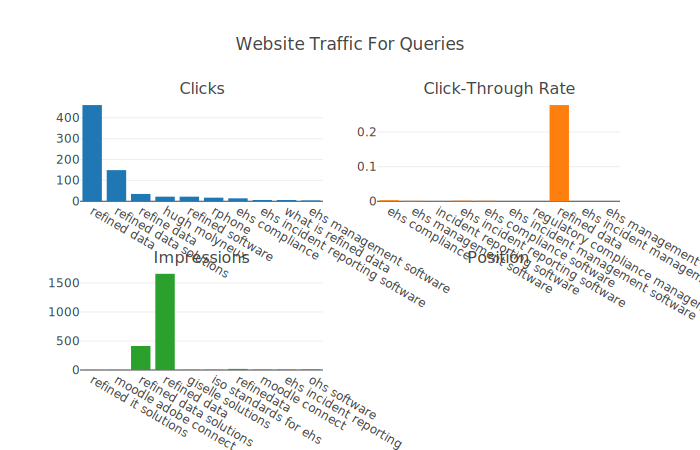

In [20]:
from plotly.subplots import make_subplots
fig = make_subplots(2, 2, specs=[[{'type':'bar'}, {'type':'bar'}], 
                                 [{'type':'bar'}, {'type':'domain'}]],
                    subplot_titles=['Clicks', 'Click-Through Rate', 'Impressions', 'Position'])

fig.add_trace(go.Bar(x=q1['Query'], y=q1["Clicks"], text='Clicks')
              , 1, 1)
fig.add_trace(go.Bar(x=q2['Query'], y=q2["CTR"], text='CTR'),
                     1, 2)
fig.add_trace(go.Bar(x=q3['Query'], y=q3["Impressions"], text='Impressions')
              , 2, 1)
fig.update_layout(showlegend=False)
fig.update_layout(title_text='Website Traffic For Queries')
fig.update_layout(
    autosize=False,
    width=900,
    height=1000,)
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='show')
fig.update_xaxes(tickangle=30)
fig.layout.template= "xgridoff"
fig.show()

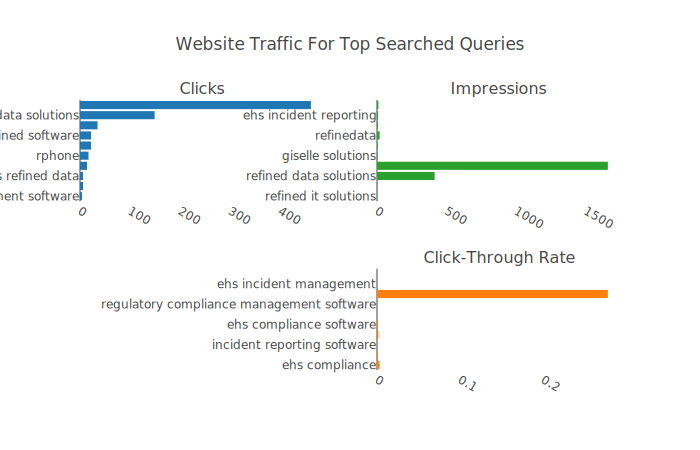

In [89]:
from plotly.subplots import make_subplots
fig = make_subplots(2, 2, specs=[[{'type':'bar'}, {'type':'bar'}], 
                                 [{'type':'bar'}, {'type':'bar'}]],
                    subplot_titles=['Clicks', 'Impressions', '', 'Click-Through Rate'])

fig.add_trace(go.Bar(x=q1['Clicks'], y=q1["Query"], name='Clicks',text='Clicks', orientation='h')
              , 1, 1)
fig.add_trace(go.Bar(x=q2['CTR'], y=q2["Query"], name='CTR', text='CTR', orientation='h'),
                     2, 2)
fig.add_trace(go.Bar(x=q3['Impressions'], y=q3["Query"],name='Impressions', text='Impressions', orientation='h')
              , 1, 2)
fig.update_layout(showlegend=False)
fig.update_layout(title_text='Website Traffic For Top Searched Queries')
fig.update_layout(
    autosize=False,
    width=1000,
    height=1000,)
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='show')
fig.update_xaxes(tickangle=30)
fig.layout.template= "xgridoff"
fig.show()

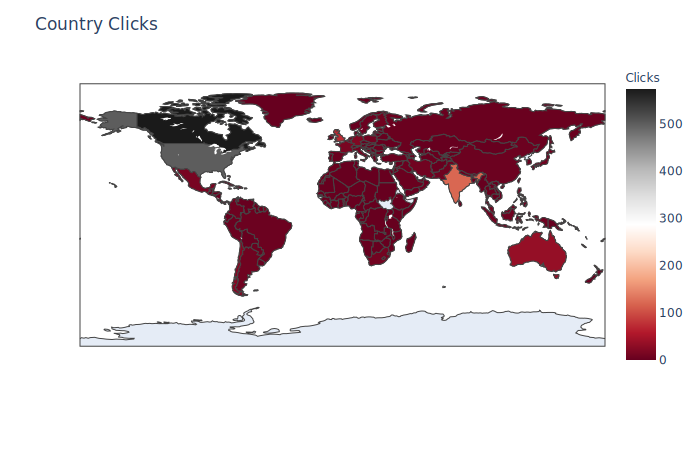

In [22]:
import plotly.express as px 
fig = px.choropleth(Countries,  # Input Pandas DataFrame
                    locations="Country",  # DataFrame column with locations
                    color="Clicks" ,# DataFrame column with color values
                    color_continuous_scale='rdgy',
                    hover_name="Country", # DataFrame column hover info
                    locationmode = 'country names') 
fig.update_layout(
    title_text = 'Country Clicks', # Create a Title
    geo_scope='world',  
)
fig.show() 

In [23]:
Pages=pd.read_excel('GoogleSearchConsole.xlsx', sheet_name='Pages')

In [24]:
Pages.head()

Page  Clicks  Impressions  \
0                       https://www.refineddata.com/    1090        23805   
1          https://www.refineddata.com/author/hughm/      37          915   
2         https://www.refineddata.com/vantage-point/      36         2403   
3  https://www.refineddata.com/ehs-compliance-man...      35        23185   
4  https://www.refineddata.com/contact-refined-da...      30         3406   

      CTR  Position  
0  0.0458     40.74  
1  0.0404     11.13  
2  0.0150     34.90  
3  0.0015     43.67  
4  0.0088      3.63

In [25]:
data=Pages.sort_values(['Clicks'], ascending=False)
data

Page  Clicks  Impressions  \
0                         https://www.refineddata.com/    1090        23805   
1            https://www.refineddata.com/author/hughm/      37          915   
2           https://www.refineddata.com/vantage-point/      36         2403   
3    https://www.refineddata.com/ehs-compliance-man...      35        23185   
4    https://www.refineddata.com/contact-refined-da...      30         3406   
..                                                 ...     ...          ...   
217  https://www.refineddata.com/tag/virtual-classr...       0            8   
216  https://www.refineddata.com/clients-2/boma-can...       0            8   
215  https://www.refineddata.com/draft_home/rds-300...       0            8   
214  https://www.refineddata.com/category/real-esta...       0            8   
448  https://www.refineddata.com/bk-new-home-page/c...       0            1   

        CTR  Position  
0    0.0458     40.74  
1    0.0404     11.13  
2    0.0150     34.90  
3    0.0015     43.67  
4    0.0088      3.63  
..      ...       ...  
217  0.0000     38.50  
216  0.0000     35.25  
215  0.0000     29.50  
214  0.0000     16.38  
448  0.0000    197.00  

[449 rows x 5 columns]

In [26]:
Pages_2=data[data.Clicks != 0]
Pages_2

Page  Clicks  Impressions  \
0                        https://www.refineddata.com/    1090        23805   
1           https://www.refineddata.com/author/hughm/      37          915   
2          https://www.refineddata.com/vantage-point/      36         2403   
3   https://www.refineddata.com/ehs-compliance-man...      35        23185   
4   https://www.refineddata.com/contact-refined-da...      30         3406   
..                                                ...     ...          ...   
73               https://www.refineddata.com/product/       1           88   
76     https://www.refineddata.com/vantage-point-pic/       1           73   
74  https://www.refineddata.com/2020/08/paper-vs-d...       1           86   
77                   https://www.refineddata.com/sla/       1           72   
67  https://www.refineddata.com/ehs-management/aag...       1          148   

       CTR  Position  
0   0.0458     40.74  
1   0.0404     11.13  
2   0.0150     34.90  
3   0.0015     43.67  
4   0.0088      3.63  
..     ...       ...  
73  0.0114      8.12  
76  0.0137     55.27  
74  0.0116     66.55  
77  0.0139      4.03  
67  0.0068      4.91  

[106 rows x 5 columns]

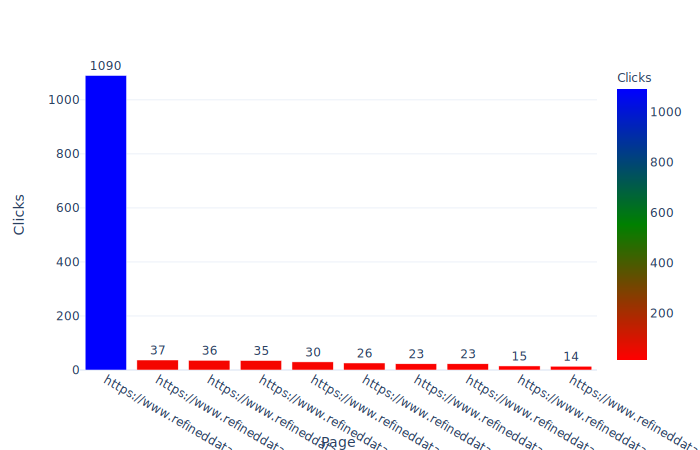

In [27]:
fig = px.bar(Pages.sort_values(by='Clicks', ascending =False).head(10), x='Page', y="Clicks", text='Clicks', color="Clicks", color_continuous_scale=["red", "green", "blue"])
fig.update_traces(texttemplate='%{text:}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='show')
fig.update_layout(yaxis={'categoryorder':'total descending'})
fig.layout.template="plotly_white"
fig.update_layout(
    autosize=False,
    width=1150,
    height=1000,)
fig.show()

In [28]:
p1= Pages.sort_values(by='Clicks', ascending =False).head(10)
p2=Pages.sort_values(by='Impressions', ascending =False).head(10)
p3=Pages.sort_values(by='CTR', ascending =False).head(10)
p4=Pages.sort_values(by='Position', ascending =False).head(10)
p1

Page  Clicks  Impressions  \
0                       https://www.refineddata.com/    1090        23805   
1          https://www.refineddata.com/author/hughm/      37          915   
2         https://www.refineddata.com/vantage-point/      36         2403   
3  https://www.refineddata.com/ehs-compliance-man...      35        23185   
4  https://www.refineddata.com/contact-refined-da...      30         3406   
5                https://www.refineddata.com/rphone/      26         1230   
6               https://www.refineddata.com/support/      23         1722   
7  https://www.refineddata.com/wp-content/uploads...      23          115   
8  https://www.refineddata.com/2020/08/20/which-i...      15         1095   
9  https://www.refineddata.com/ehs-incident-repor...      14        15357   

      CTR  Position  
0  0.0458     40.74  
1  0.0404     11.13  
2  0.0150     34.90  
3  0.0015     43.67  
4  0.0088      3.63  
5  0.0211     11.29  
6  0.0134      2.32  
7  0.2000     11.82  
8  0.0137     42.63  
9  0.0009     44.12

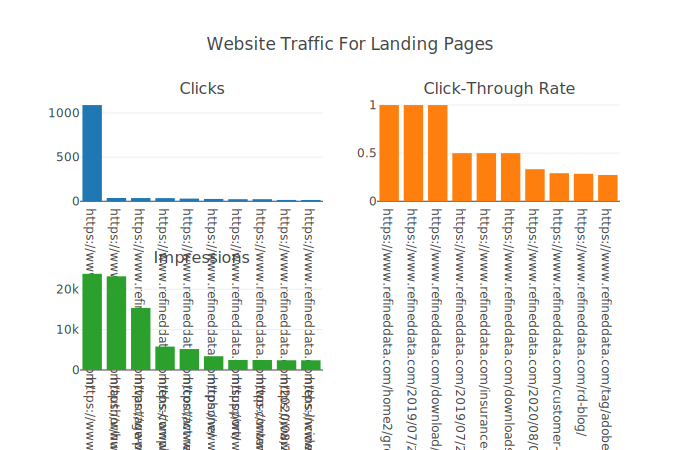

In [29]:
from plotly.subplots import make_subplots
fig = make_subplots(2, 2, specs=[[{'type':'bar'}, {'type':'bar'}], 
                                 [{'type':'bar'}, {'type':'domain'}]],
                    subplot_titles=['Clicks', 'Click-Through Rate', 'Impressions', ''])

fig.add_trace(go.Bar(x=p1['Page'], y=p1["Clicks"], text='Clicks')
              , 1, 1)
fig.add_trace(go.Bar(x=p3['Page'], y=p3["CTR"], text='CTR'),
                     1, 2)
fig.add_trace(go.Bar(x=p2['Page'], y=p2["Impressions"], text='Impressions')
              , 2, 1)
fig.update_layout(title_text='Website Traffic For Landing Pages')
fig.update_layout(
    autosize=False,
    width=1000,
    height=1000,)
fig.update_layout(showlegend=False)
fig.layout.template= "xgridoff"
fig.show()

In [30]:
Dates_df= pd.read_excel('GoogleSearchConsole.xlsx', sheet_name="Dates")
Dates_df.tail(n=10)

Date  Clicks  Impressions     CTR  Position Day Of Week
328 2020-11-23       4          564  0.0071     38.62      Monday
329 2020-11-24       2          398  0.0050     37.75     Tuesday
330 2020-11-25       2          429  0.0047     43.23   Wednesday
331 2020-11-26       7          424  0.0165     42.21    Thursday
332 2020-11-27       2          357  0.0056     41.35      Friday
333 2020-11-28       4          471  0.0085     40.98    Saturday
334 2020-11-29       9          536  0.0168     36.49      Sunday
335 2020-11-30       7          456  0.0154     36.04      Monday
336 2020-12-01       7          505  0.0139     35.52     Tuesday
337 2020-12-02       3          205  0.0146     37.06   Wednesday

In [31]:
Dates_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         338 non-null    datetime64[ns]
 1   Clicks       338 non-null    int64         
 2   Impressions  338 non-null    int64         
 3   CTR          338 non-null    float64       
 4   Position     338 non-null    float64       
 5   Day Of Week  338 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 16.0+ KB


In [32]:
Dates_df.columns

Index(['Date', 'Clicks', 'Impressions', 'CTR', 'Position', 'Day Of Week'], dtype='object')

In [33]:
df1dm = Dates_df.reset_index().resample('D', on='Date').mean()
df1wm = Dates_df.reset_index().resample('W', on='Date').mean()
df1mm = Dates_df.reset_index().resample('M', on='Date').mean()

In [34]:
df1wm

index    Clicks  Impressions       CTR   Position
Date                                                         
2020-01-05    2.5  3.500000   205.166667  0.016450  38.878333
2020-01-12    9.0  4.285714   180.000000  0.024714  35.314286
2020-01-19   16.0  4.714286   188.714286  0.025500  43.158571
2020-01-26   23.0  5.714286   212.000000  0.026257  41.718571
2020-02-02   30.0  4.714286   209.857143  0.022329  41.461429
2020-02-09   37.0  4.571429   193.714286  0.022871  40.128571
2020-02-16   44.0  2.571429   211.714286  0.012114  38.182857
2020-02-23   51.0  4.857143   186.571429  0.024143  43.062857
2020-03-01   58.0  5.285714   147.000000  0.035414  45.671429
2020-03-08   65.0  4.142857   153.428571  0.025314  45.725714
2020-03-15   72.0  5.000000   119.714286  0.040514  45.260000
2020-03-22   79.0  3.714286   147.428571  0.023471  42.937143
2020-03-29   86.0  5.142857   278.428571  0.017229  46.420000
2020-04-05   93.0  2.857143   235.571429  0.012086  45.830000
2020-04-12  100.0  3.142857   181.571429  0.016014  41.395714
2020-04-19  107.0  6.285714   313.285714  0.025129  49.507143
2020-04-26  114.0  4.142857   335.428571  0.012029  46.182857
2020-05-03  121.0  3.857143   252.142857  0.016700  46.847143
2020-05-10  128.0  5.000000   153.142857  0.033614  41.517143
2020-05-17  135.0  3.000000   115.285714  0.024714  37.408571
2020-05-24  142.0  2.714286   125.857143  0.021486  42.051429
2020-05-31  149.0  3.285714   162.142857  0.019786  47.660000
2020-06-07  156.0  3.857143   147.714286  0.025100  46.920000
2020-06-14  163.0  5.428571   142.285714  0.044843  40.962857
2020-06-21  170.0  3.857143   173.714286  0.022314  45.451429
2020-06-28  177.0  3.428571   180.571429  0.020643  47.402857
2020-07-05  184.0  3.428571   224.857143  0.015471  49.207143
2020-07-12  191.0  2.142857   176.142857  0.011971  43.842857
2020-07-19  198.0  3.857143   186.714286  0.020486  44.744286
2020-07-26  205.0  3.142857   178.714286  0.016986  47.257143
2020-08-02  212.0  4.142857   196.571429  0.018929  49.841429
2020-08-09  219.0  4.714286   238.000000  0.022100  47.564286
2020-08-16  226.0  4.428571   256.857143  0.015843  47.437143
2020-08-23  233.0  3.857143   303.428571  0.012914  45.658571
2020-08-30  240.0  4.714286   344.000000  0.014514  46.311429
2020-09-06  247.0  4.714286   551.142857  0.009014  50.920000
2020-09-13  254.0  4.857143   785.000000  0.005957  48.840000
2020-09-20  261.0  5.857143   867.428571  0.006586  47.008571
2020-09-27  268.0  8.571429   898.428571  0.009429  44.325714
2020-10-04  275.0  5.714286   917.857143  0.006086  44.300000
2020-10-11  282.0  6.571429   889.000000  0.007514  43.667143
2020-10-18  289.0  7.571429   626.571429  0.012857  44.837143
2020-10-25  296.0  9.857143   726.857143  0.013786  44.478571
2020-11-01  303.0  4.571429   593.714286  0.007386  45.208571
2020-11-08  310.0  5.857143   306.714286  0.019986  44.978571
2020-11-15  317.0  4.714286   406.000000  0.011657  41.244286
2020-11-22  324.0  5.571429   467.857143  0.011543  39.805714
2020-11-29  331.0  4.285714   454.142857  0.009171  40.090000
2020-12-06  336.0  5.666667   388.666667  0.014633  36.206667

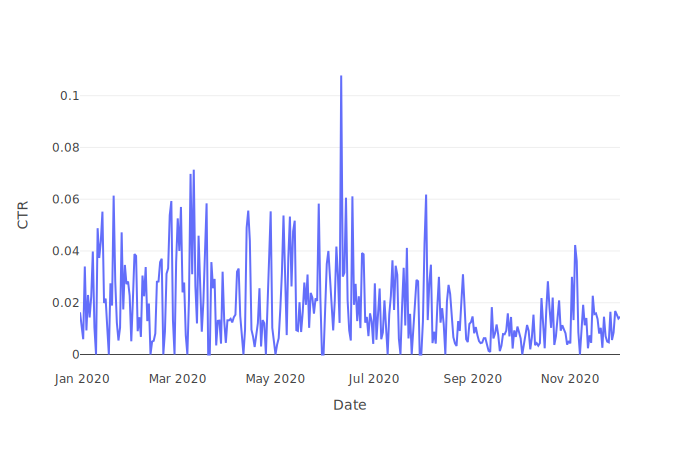

In [35]:
fig = px.line(Dates_df, x='Date', y="CTR")
fig.layout.template="xgridoff"
fig.show()

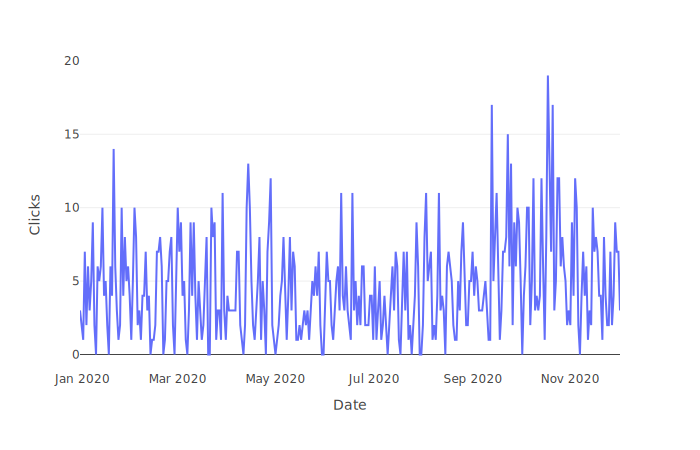

In [36]:
fig = px.line(Dates_df, x='Date', y="Clicks")
fig.layout.template="xgridoff"
fig.show()

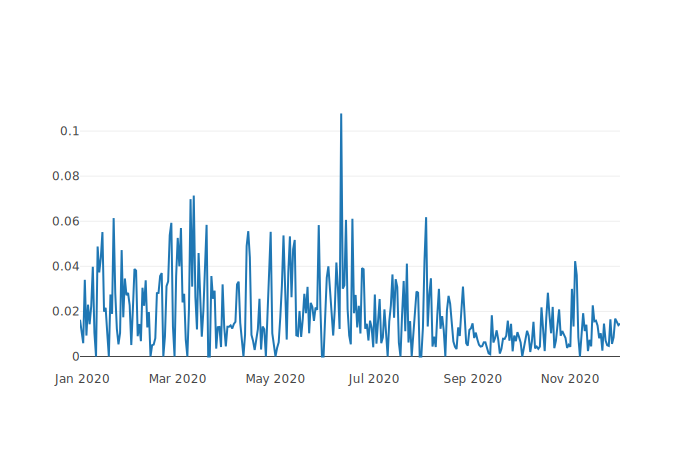

In [37]:
fig = go.Figure([go.Scatter(x=Dates_df['Date'], y=Dates_df['CTR'])])
fig.layout.template="xgridoff"
fig.show()

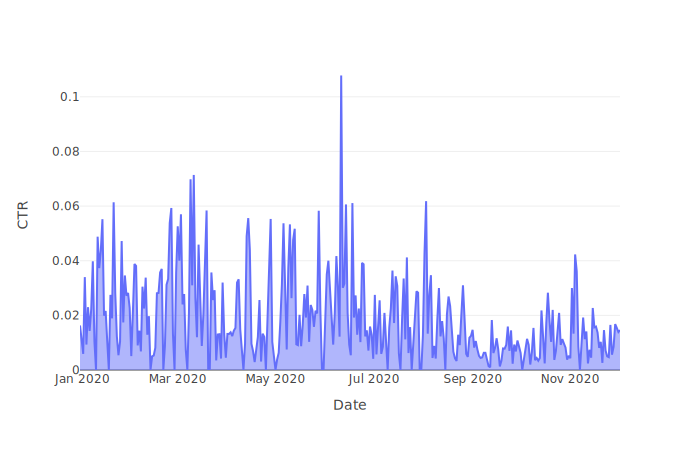

In [38]:
fig = px.area(Dates_df, x='Date', y="CTR")
fig.layout.template="xgridoff"
fig.show()

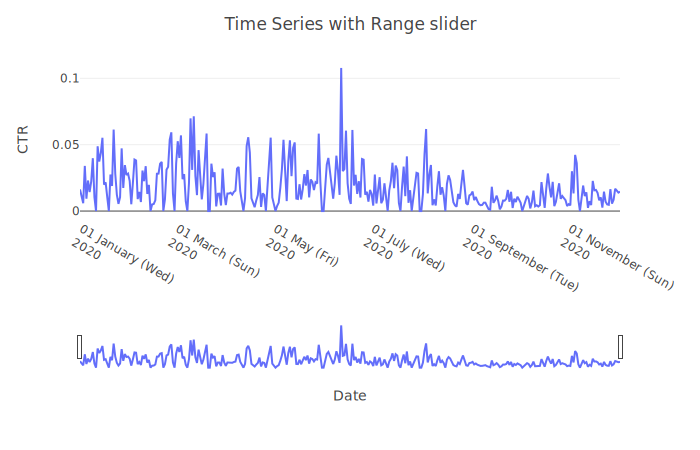

In [39]:
fig = px.line(Dates_df, x='Date', y='CTR')
fig.update_layout(
    title = 'Time Series with Range slider',
    xaxis_tickformat = '%d %B (%a)<br>%Y'
)
fig.update_xaxes(rangeslider_visible=True)
fig.layout.template="xgridoff"
fig.show()

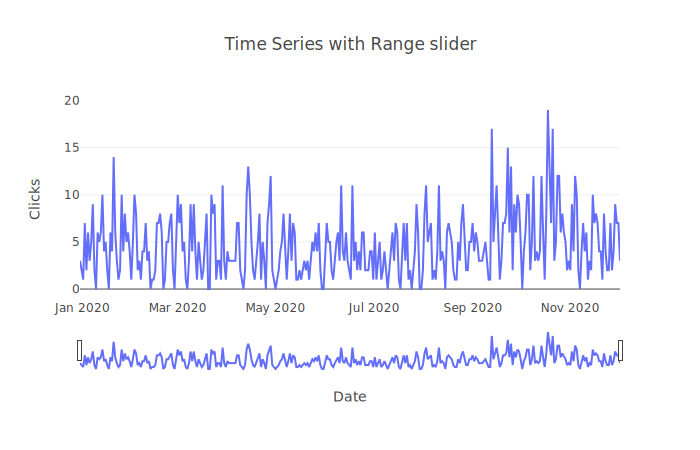

In [40]:
fig = px.line(Dates_df, x='Date', y='Clicks', title='Time Series with Range slider')
fig.update_xaxes(rangeslider_visible=True)
fig.layout.template="xgridoff"
fig.show()

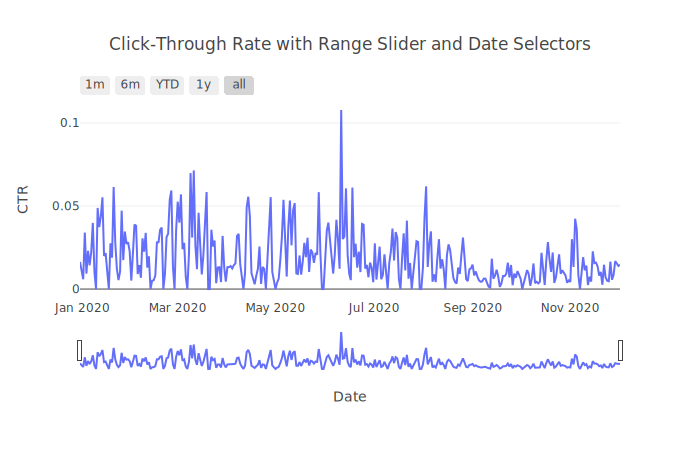

In [41]:
fig = px.line(Dates_df, x='Date', y='CTR', title='Click-Through Rate with Range Slider and Date Selectors')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
           dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.layout.template="xgridoff"
fig.show()

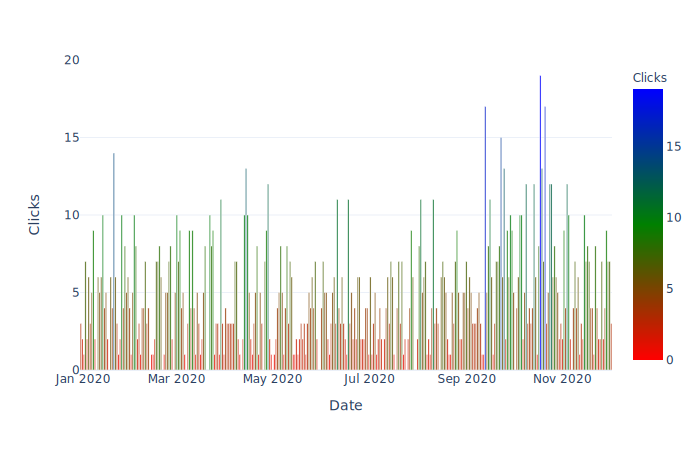

In [42]:
fig = px.bar(Dates_df, x='Date',text='Clicks', y="Clicks", color='Clicks', color_continuous_scale=["red", "green", "blue"])
fig.update_traces(texttemplate='%{text:}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.update_layout(yaxis={'categoryorder':'total descending'})
fig.layout.template="plotly_white"
fig.show()

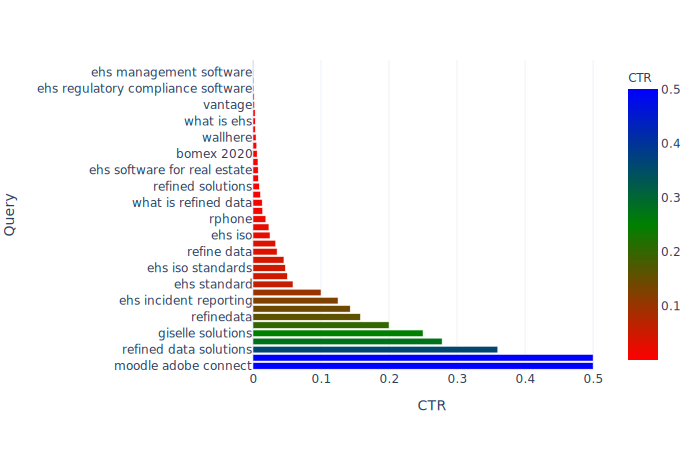

In [43]:
fig = px.bar(Query_2, x='CTR', y="Query", text='CTR', color="CTR", color_continuous_scale=["red", "green", "blue"])
fig.update_traces(texttemplate='%{text:}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.update_layout(yaxis={'categoryorder':'total descending'})
fig.layout.template="plotly_white"
fig.show()

In [44]:
Devices=pd.read_excel('GoogleSearchConsole.xlsx', sheet_name="Devices")
Devices.head(n=10)

Device  Clicks  Impressions     CTR  Position
0  Desktop    1367        95579  0.0143     46.08
1   Mobile     189        13881  0.0136     37.14
2   Tablet      13          340  0.0382     25.06

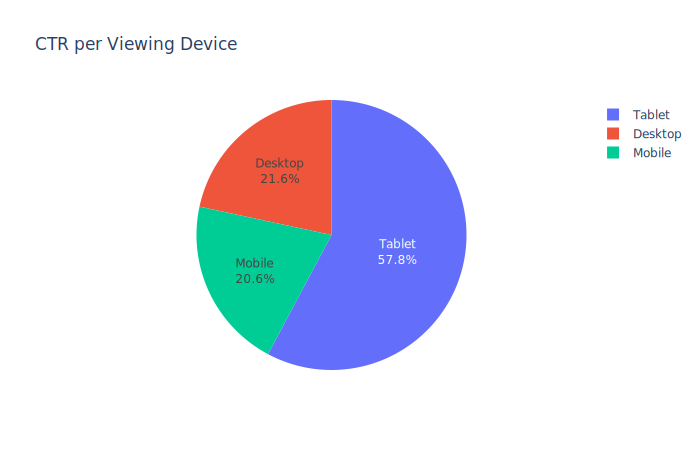

In [45]:
fig = px.pie(Devices, values='CTR', names='Device',
             title='CTR per Viewing Device')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

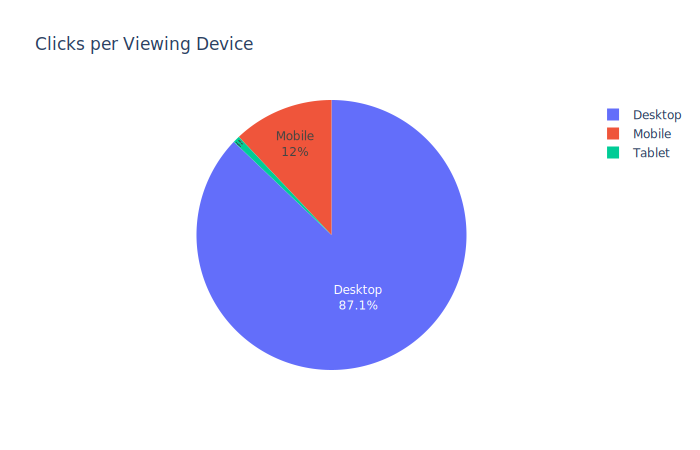

In [46]:
fig = px.pie(Devices, values='Clicks', names='Device',
             title='Clicks per Viewing Device')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

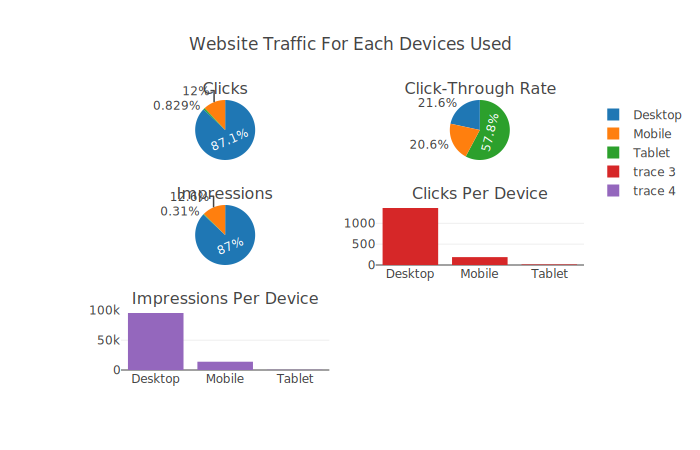

In [47]:
from plotly.subplots import make_subplots
fig = make_subplots(3, 2, specs=[[{'type':'domain'}, {'type':'domain'}], 
                                 [{'type':'domain'}, {'type':'bar'}],
                                 [{'type':'bar'}, {'type':'bar'}]],
                    subplot_titles=['Clicks', 'Click-Through Rate', 'Impressions', 'Clicks Per Device', 'Impressions Per Device'])
fig.add_trace(go.Pie(labels=Devices['Device'], values=Devices['Clicks'], scalegroup='one',
                     name="Clicks"), 1, 1)
fig.add_trace(go.Pie(labels=Devices['Device'], values=Devices['CTR'], scalegroup='two', 
                     name="CTR"), 1, 2)
fig.add_trace(go.Pie(labels=Devices['Device'], values=Devices['Impressions'], scalegroup='three',
                     name="Impressions"), 2, 1)
fig.add_trace(go.Bar(x=Devices["Device"], y=Devices["Clicks"], text='Clicks')
              , 2, 2)
fig.add_trace(go.Bar(x=Devices["Device"], y=Devices["Impressions"], text='Impressions')
              , 3, 1)
fig.update_layout(title_text='Website Traffic For Each Devices Used')
fig.update_layout(
    autosize=False,
    width=1000,
    height=1500,)

fig.layout.template="xgridoff"
fig.show()

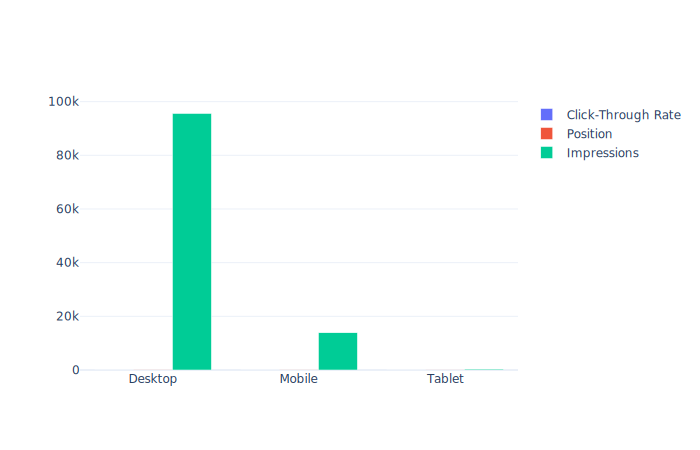

In [48]:
fig =go.Figure(go.Bar(x=Devices['Device'], y= Devices['CTR'], name='Click-Through Rate'))
fig.add_trace(go.Bar(x=Devices['Device'], y= Devices['Position'], name='Position'))
fig.add_trace(go.Bar(x=Devices['Device'], y= Devices['Impressions'], name='Impressions'))
fig.update_layout(
    autosize=False,
    width=1000,
    height=800,)
fig.update_layout(barmode='group')
fig.update_xaxes(categoryorder='category ascending')
fig.layout.template="plotly_white"
fig.show()

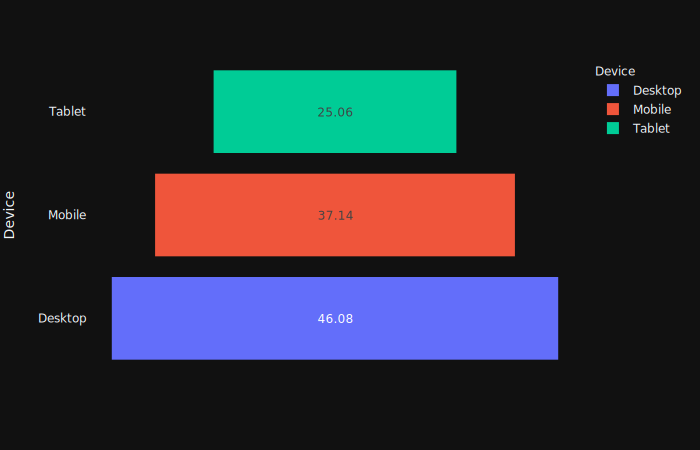

In [49]:
fig = px.funnel(Devices, x='Position', y='Device', color='Device')
fig.layout.template="plotly_dark"
fig.show()

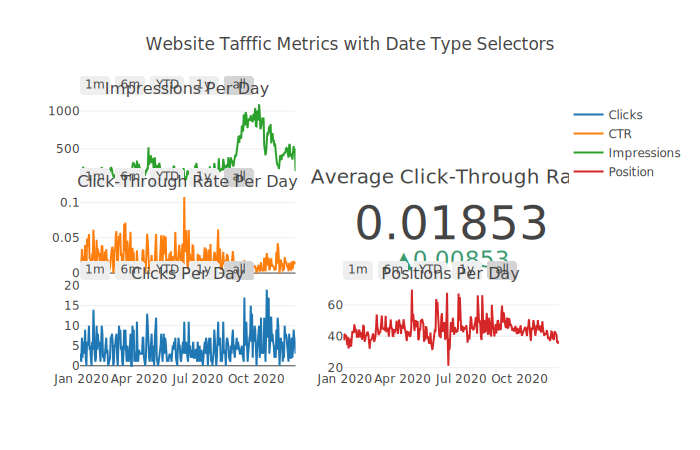

In [50]:
from plotly.subplots import make_subplots
fig = make_subplots(
    rows=3, cols=2,
    shared_xaxes=True,
    vertical_spacing=0.03,
    specs=[[{"type": "scatter"}, {"type": "Scatter"}],
           [{"type": "scatter"}, {"type": "domain"}],
           [{"type": "scatter"}, {"type": "scatter"}]],
    subplot_titles=("Impressions Per Day","", "Click-Through Rate Per Day","", "Clicks Per Day","Positions Per Day")
)

fig.add_trace(
    go.Scatter(
        x=Dates_df["Date"],
        y=Dates_df["Clicks"],
        mode="lines",
        name="Clicks"
    ),
    row=3, col=1
)

fig.add_trace(
    go.Scatter(
        x=Dates_df["Date"],
        y=Dates_df["CTR"],
        mode="lines",
        name="CTR"
    ),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(
        x=Dates_df["Date"],
        y=Dates_df["Impressions"],
        mode="lines",
        name="Impressions"
    ),
    row=1, col=1
)
fig.add_trace(
  go.Scatter(
        x=Dates_df["Date"],
        y=Dates_df["Position"],
        mode="lines",
        name="Position"
    ),
    row=3, col=2
)

fig.add_trace(
  go.Indicator(
    mode = "number+delta",
    delta = {'reference': 0.01},
    value =  Dates_df["CTR"].mean(),
    domain = {'x': [0.1, 1], 'y': [0.2, 0.9]},
    title = {'text': "Average Click-Through Rate"}),
    row=2, col=2
)

fig.update_layout(
    height=800,
    showlegend=True,
    title_text="Website Tafffic Metrics with Date Type Selectors",
)
fig.update_xaxes(
    rangeslider_visible=False,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.update_layout(
    autosize=False,
    width=1150,
    height=1000,)
fig.layout.template="xgridoff"
fig.show()


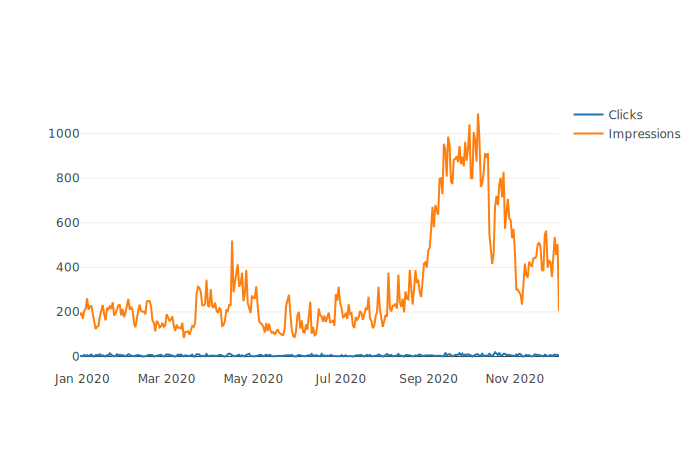

In [51]:

# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(
        x=Dates_df["Date"],
        y=Dates_df["Clicks"],
        mode="lines",
        name="Clicks"
    ))
fig.add_trace(go.Scatter(
        x=Dates_df["Date"],
        y=Dates_df["Impressions"],
        mode="lines",
        name="Impressions"
    ))
fig.layout.template="xgridoff"
fig.show()

In [52]:
Countries.head()

Country  Clicks  Impressions     CTR  Position
0          Canada     573         8827  0.0649     33.80
1   United States     500        17194  0.0291     39.39
2           India     120         7506  0.0160     38.13
3  United Kingdom      71         4893  0.0145     47.12
4       Australia      35         2081  0.0168     52.52

In [53]:
Countries2= Countries[Countries.Clicks != 0]

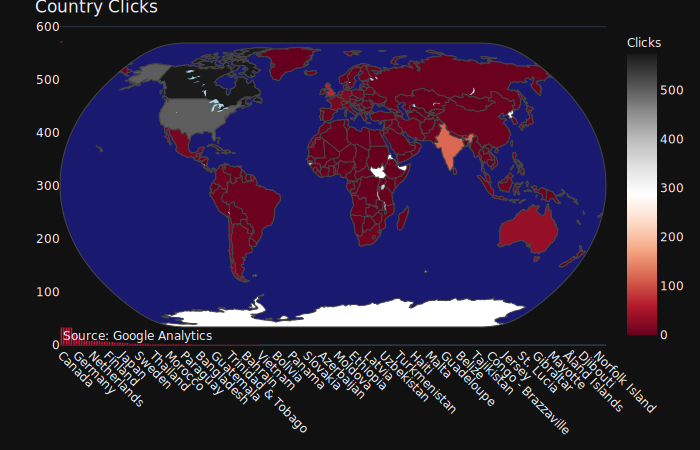

In [54]:
fig = make_subplots(
    rows=2, cols=2)
# Add scattergeo globe map of volcano locations
fig = px.choropleth(Countries,  # Input Pandas DataFrame
                    locations="Country",  # DataFrame column with locations
                    color="Clicks" ,# DataFrame column with color values
                    color_continuous_scale='rdgy',
                    hover_name="Country", # DataFrame column hover info
                    locationmode = 'country names') 
fig.update_layout(
    title_text = 'Country Clicks', # Create a Title
    geo_scope='world'
)

# Add locations bar chart
fig.add_trace(
    go.Bar(x= Countries["Country"],y=Countries["Clicks"], marker=dict(color="crimson"), showlegend=False)
)

# Update geo subplot properties
fig.update_geos(
    projection_type="natural earth",
    landcolor="white",
    oceancolor="MidnightBlue",
    showocean=True,
    lakecolor="LightBlue"
)

# Rotate x-axis labels
fig.update_xaxes(tickangle=45)

# Set theme, margin, and annotation in layout
fig.update_layout(
    template="plotly_dark",
    margin=dict(r=10, t=25, b=40, l=60),
    annotations=[
        dict(
            text="Source: Google Analytics",
            showarrow=False,
            xref="paper",
            yref="paper",
            x=0,
            y=0)
    ]
)

fig.show()

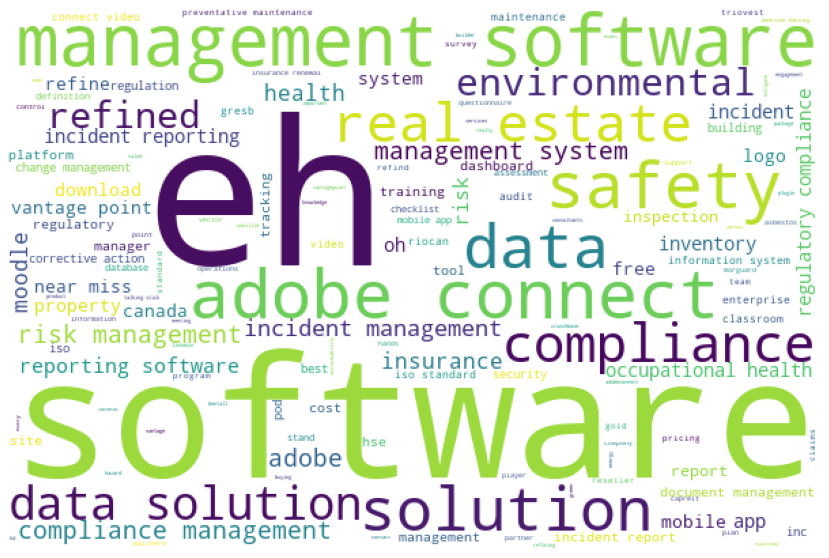

In [55]:
import wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud 
plt.subplots(figsize = (15,10))
wordcloud = WordCloud(
                    background_color = 'white',
                    width = 600,
                    height = 400
                        ).generate(' '.join(Queries['Query']))
plt.imshow(wordcloud) # image show
plt.axis('off') # to off the axis of x and y
plt.show()

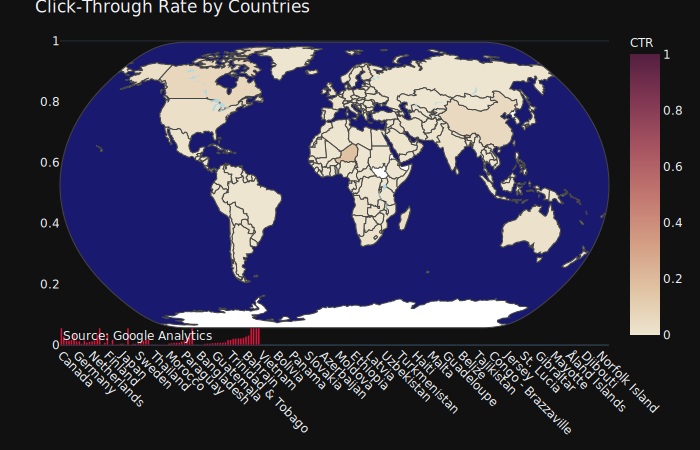

In [56]:
fig = make_subplots(
    rows=2, cols=2)
# Add scattergeo globe map of volcano locations
fig = px.choropleth(Countries,  # Input Pandas DataFrame
                    locations="Country",  # DataFrame column with locations
                    color="CTR" ,# DataFrame column with color values
                    color_continuous_scale='brwnyl',
                    hover_name="Country", # DataFrame column hover info
                    locationmode = 'country names') 
fig.update_layout(
    title_text = 'Click-Through Rate by Countries', # Create a Title
    geo_scope='world'
)

# Add locations bar chart
fig.add_trace(
    go.Bar(x= Countries["Country"],y=Countries["CTR"], marker=dict(color="crimson"), showlegend=False)
)

# Update geo subplot properties
fig.update_geos(
    projection_type="natural earth",
    landcolor="white",
    oceancolor="MidnightBlue",
    showocean=True,
    lakecolor="LightBlue"
)

# Rotate x-axis labels
fig.update_xaxes(tickangle=45)

# Set theme, margin, and annotation in layout
fig.update_layout(
    template="plotly_dark",
    margin=dict(r=10, t=25, b=40, l=60),
    annotations=[
        dict(
            text="Source: Google Analytics",
            showarrow=False,
            xref="paper",
            yref="paper",
            x=0,
            y=0)
    ]
)

fig.show()

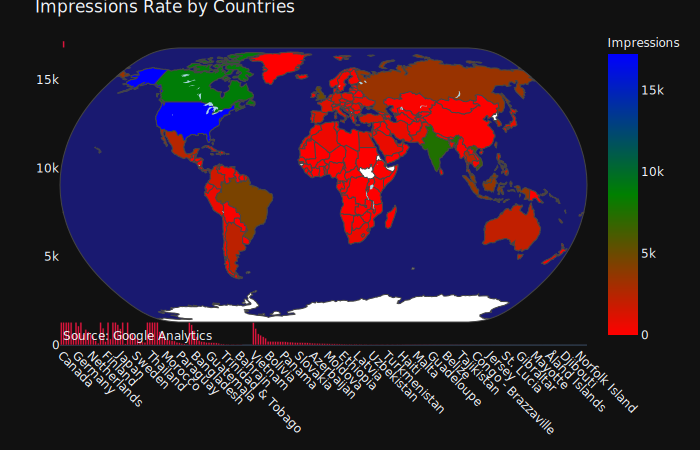

In [57]:
fig = make_subplots(
    rows=2, cols=2)
# Add scattergeo globe map of volcano locations
fig = px.choropleth(Countries,  # Input Pandas DataFrame
                    locations="Country",  # DataFrame column with locations
                    color="Impressions" ,# DataFrame column with color values
                    color_continuous_scale=["red", "green", "blue"],
                    hover_name="Country", # DataFrame column hover info
                    locationmode = 'country names') 
fig.update_layout(
    title_text = 'Impressions Rate by Countries', # Create a Title
    geo_scope='world'
)

# Add locations bar chart
fig.add_trace(
    go.Bar(x= Countries["Country"],y=Countries["Impressions"], marker=dict(color="crimson"), showlegend=False)
)

# Update geo subplot properties
fig.update_geos(
    projection_type="natural earth",
    landcolor="white",
    oceancolor="MidnightBlue",
    showocean=True,
    lakecolor="LightBlue"
)

# Rotate x-axis labels
fig.update_xaxes(tickangle=45)

# Set theme, margin, and annotation in layout
fig.update_layout(
    template="plotly_dark",
    margin=dict(r=10, t=25, b=40, l=60),
    annotations=[
        dict(
            text="Source: Google Analytics",
            showarrow=False,
            xref="paper",
            yref="paper",
            x=0,
            y=0)
    ]
)

fig.show()

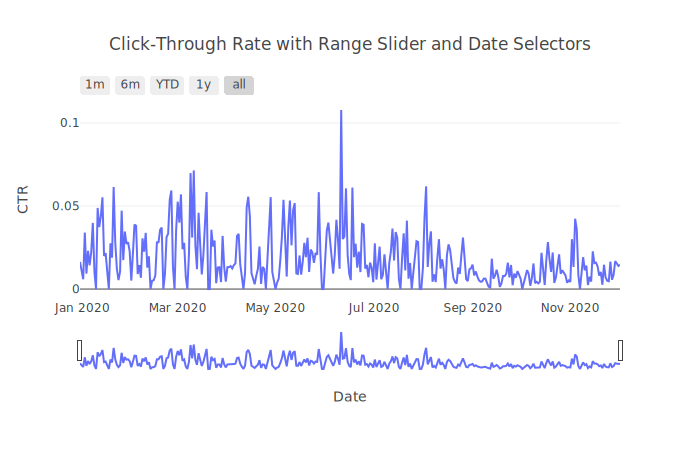

In [58]:
fig = px.line(Dates_df, x='Date', y='CTR', title='Click-Through Rate with Range Slider and Date Selectors')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
           dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.layout.template="xgridoff"
fig.show()

In [59]:
import pandas as pd
from fbprophet import Prophet

In [60]:
TS=pd.read_excel('TS.xlsx')
TS.tail(n=10)

ds       y
328 2020-11-23  0.0071
329 2020-11-24  0.0050
330 2020-11-25  0.0047
331 2020-11-26  0.0165
332 2020-11-27  0.0056
333 2020-11-28  0.0085
334 2020-11-29  0.0168
335 2020-11-30  0.0154
336 2020-12-01  0.0139
337 2020-12-02  0.0146

In [61]:
m = Prophet(yearly_seasonality=True, weekly_seasonality=True,daily_seasonality=True)
m.fit(TS)

In [62]:
future = m.make_future_dataframe(periods=60)
future.tail()

ds
393 2021-01-27
394 2021-01-28
395 2021-01-29
396 2021-01-30
397 2021-01-31

In [63]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds      yhat  yhat_lower  yhat_upper
393 2021-01-27  0.026117    0.011079    0.042068
394 2021-01-28  0.022103    0.004993    0.038156
395 2021-01-29  0.009626   -0.007012    0.025519
396 2021-01-30  0.010638   -0.006308    0.026473
397 2021-01-31  0.018878    0.003671    0.035451

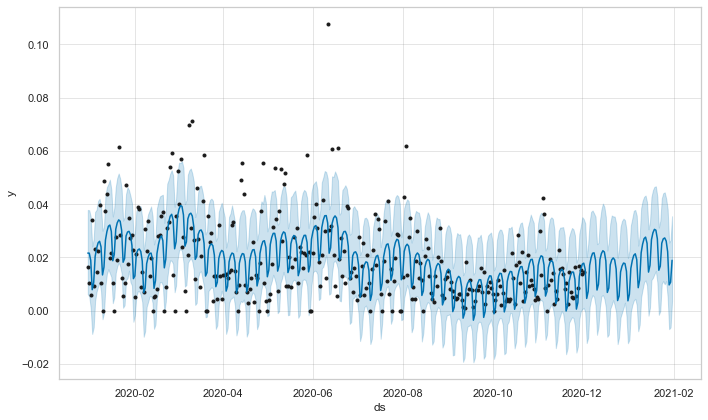

In [64]:
fig1 = m.plot(forecast)

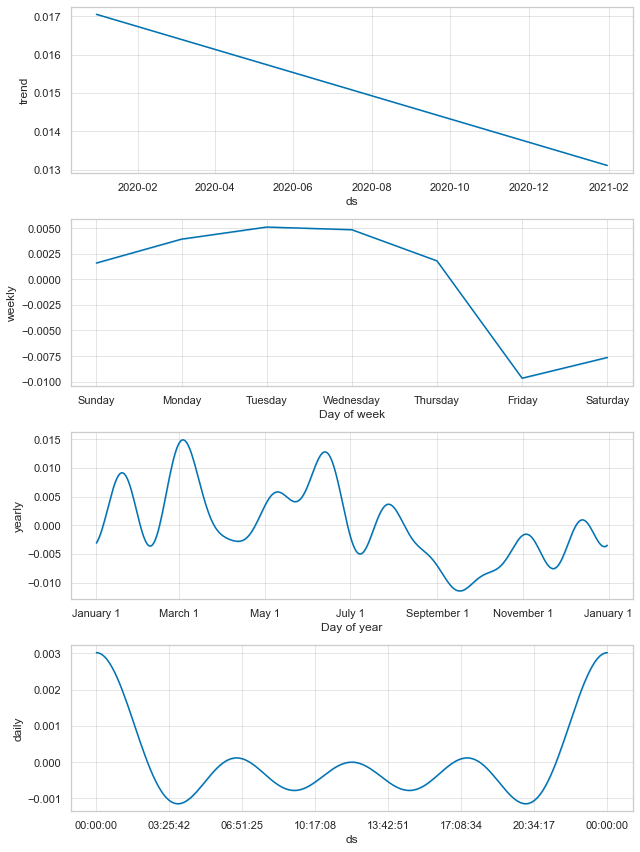

In [65]:
fig2 = m.plot_components(forecast)

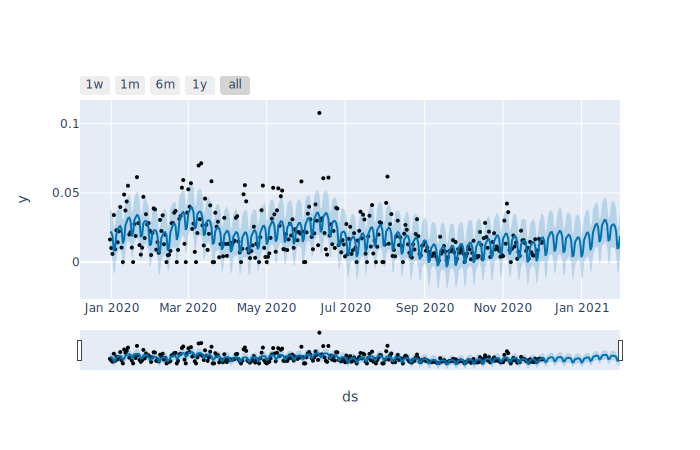

In [66]:
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [67]:
import sklearn.metrics as metrics
def timeseries_evaluation_metrics_func(y_true, y_pred):
    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    #print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [68]:
validate = TS[['ds','y']].tail(48)
TS.drop(TS[['ds','y']].tail(48).index,inplace=True)
train = TS[['ds','y']]

In [69]:
m = Prophet(yearly_seasonality=False)
m.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [70]:
p = 48
future =m.make_future_dataframe(periods=p,freq='D',include_history=False)
forecast = m.predict(future)
timeseries_evaluation_metrics_func(validate.y,forecast.yhat)

MSE is : 0.00010825004750505295
MAE is : 0.00811350709906553
RMSE is : 0.010404328306289309
MAPE is : inf
R2 is : -0.4423593725191355



<ipython-input-67-8af5f1ea73a2>:5: RuntimeWarning:

divide by zero encountered in true_divide



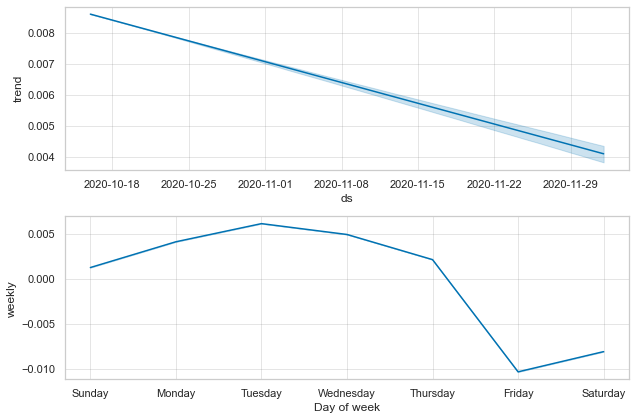

In [71]:
fig2 = m.plot_components(forecast)

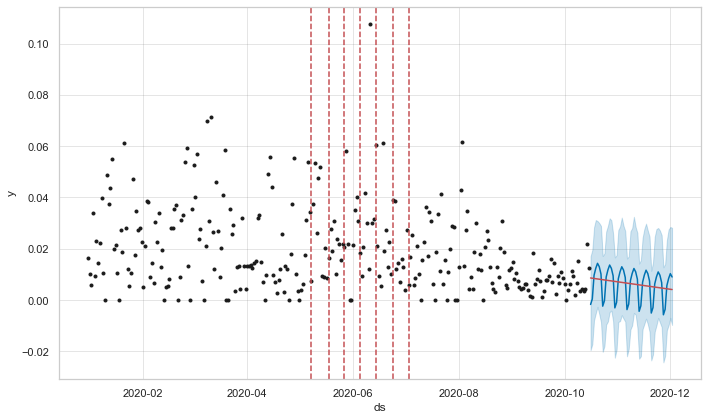

In [72]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [73]:
from tbats import TBATS, BATS
#Fit the model
estimator = TBATS(seasonal_periods=(7, 365.25))
model = estimator.fit(TS['y'])
# Forecast 10 days ahead
y_forecast = model.forecast(steps=10)

In [74]:
y_forecast

array([0.02927727, 0.06852112, 0.13942544, 0.23633103, 0.37117796,
       0.56040969, 0.81001051, 1.13841166, 1.57851793, 2.14735868])

In [75]:
TS2=pd.read_excel('TS.xlsx')
TS2.tail(n=10)

ds       y
328 2020-11-23  0.0071
329 2020-11-24  0.0050
330 2020-11-25  0.0047
331 2020-11-26  0.0165
332 2020-11-27  0.0056
333 2020-11-28  0.0085
334 2020-11-29  0.0168
335 2020-11-30  0.0154
336 2020-12-01  0.0139
337 2020-12-02  0.0146

In [76]:
from neuralprophet import NeuralProphet
m = NeuralProphet(daily_seasonality=True, yearly_seasonality=True, weekly_seasonality=True)
metrics = m.fit(TS2,validate_each_epoch=False, freq="D")

INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO:nprophet.config:Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 94
INFO:nprophet.config:Auto-set epochs to 94


INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 1.52E-01
INFO:nprophet:learning rate range test found optimal lr: 1.52E-01
Epoch[94/94]: 100%|██████████| 94/94 [00:08<00:00, 10.93it/s, SmoothL1Loss=0.0343, MAE=0.0097, RegLoss=0] 


In [77]:
future = m.make_future_dataframe(TS2, periods=365, n_historic_predictions=len(TS2))
forecast = m.predict(future)

Text(0.5, 1.0, 'Neural Prophet CTR Forecast')

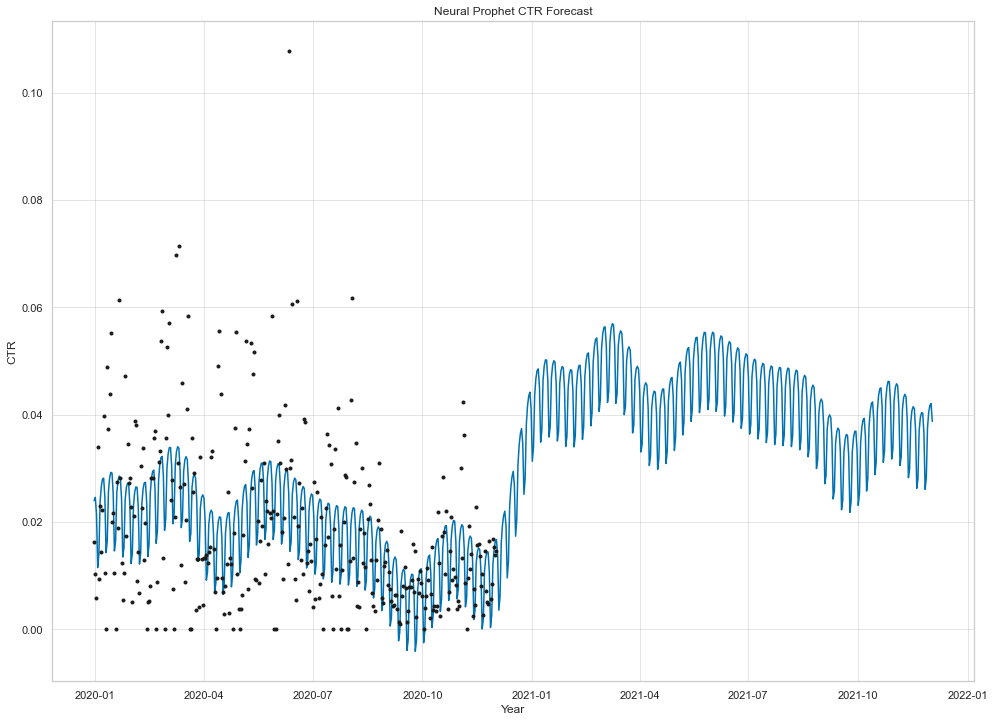

In [78]:
fig,ax=plt.subplots(figsize=(14,10))
m.plot(forecast, xlabel="Year", ylabel="CTR", ax=ax)
ax.set_title("Neural Prophet CTR Forecast")

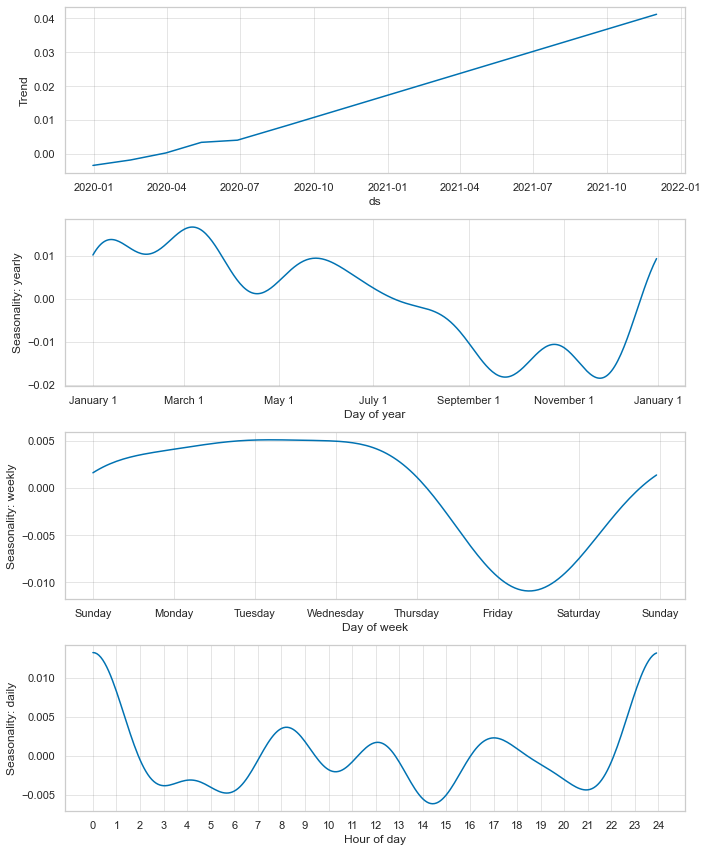

In [79]:
fig_comp = m.plot_components(forecast)

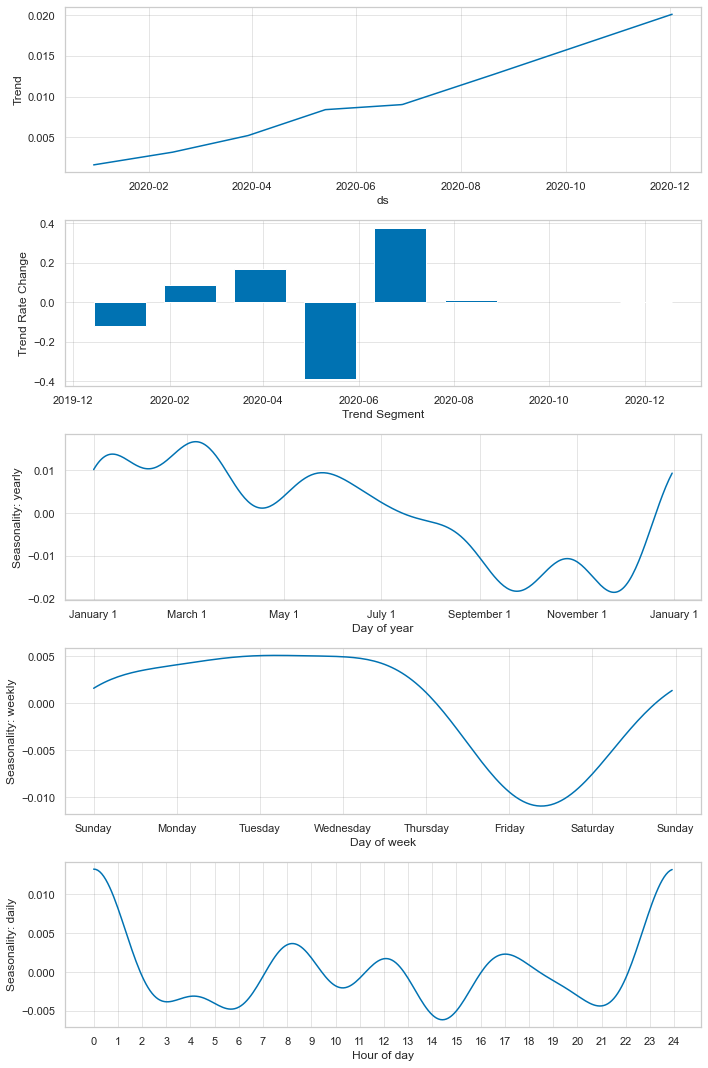

In [80]:
fig_param = m.plot_parameters()

In [81]:
m = NeuralProphet()
df_train, df_val = m.split_df(TS2, valid_p=0.2)

In [82]:
train_metrics = m.fit(df_train, freq='D')
val_metrics = m.test(df_val)

INFO: nprophet.utils - set_auto_seasonalities: Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO:nprophet.utils:Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO: nprophet.utils - set_auto_seasonalities: Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:nprophet.utils:Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO:nprophet.config:Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 118
INFO:nprophet.config:Auto-set epochs to 118


INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 4.33E-01
INFO:nprophet:learning rate range test found optimal lr: 4.33E-01
Epoch[118/118]: 100%|██████████| 118/118 [00:07<00:00, 16.71it/s, SmoothL1Loss=0.0373, MAE=0.0108, RegLoss=0]
INFO: nprophet - _evaluate: Validation metrics:    SmoothL1Loss    MAE
1         0.032  0.010
INFO:nprophet:Validation metrics:    SmoothL1Loss    MAE
1         0.032  0.010


In [83]:
m = NeuralProphet()
metrics = m.fit(TS2, validate_each_epoch=True, valid_p=0.2, freq='D')

INFO: nprophet.utils - set_auto_seasonalities: Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO:nprophet.utils:Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO: nprophet.utils - set_auto_seasonalities: Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:nprophet.utils:Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 8
INFO:nprophet.config:Auto-set batch_size to 8
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 118
INFO:nprophet.config:Auto-set epochs to 118


INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 4.33E-02
INFO:nprophet:learning rate range test found optimal lr: 4.33E-02
Epoch[118/118]: 100%|██████████| 118/118 [00:07<00:00, 16.22it/s, SmoothL1Loss=0.0372, MAE=0.0108, RegLoss=0, MAE_val=0.0103, SmoothL1Loss_val=0.0315] 
